# Exploratory Data Analysis (EDA) - Retail Cafe Sales Dataset

This notebook performs a comprehensive EDA on the cleaned retail cafe sales data to understand patterns, trends, and insights from the transaction data.

## 1. Import Required Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Settings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load the Cleaned Dataset

In [2]:
# Load the cleaned dataset
df = pd.read_csv('cleaned_data/Retail_dataset - Cleaned_data.csv')

# Display first few rows
print("Dataset loaded successfully!")
print(f"\nDataset Shape: {df.shape[0]} rows, {df.shape[1]} columns")
df.head(10)

Dataset loaded successfully!

Dataset Shape: 10000 rows, 10 columns


,Transaction ID,Items,Quantity,Price Per Unit,Total Spent,Payment Method,txn_loc,Transaction Date,Items Category,Txn_Month
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08,Drinks,9
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16,Bakery,5
2,TXN_4271903,Cookie,4,1.0,4.0,Credit Card,In-store,2023-07-19,Bakery,7
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,Other,2023-04-27,Food,4
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11,Drinks,6
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,Other,2023-03-31,Drinks,3
6,TXN_4433211,Other,3,3.0,9.0,UNKNOWN,Takeaway,2023-10-06,Food,10
7,TXN_6699534,Sandwich,4,4.0,16.0,Cash,Other,2023-10-28,Food,10
8,TXN_4717867,Other,5,3.0,15.0,UNKNOWN,Takeaway,2023-07-28,Food,7
9,TXN_2064365,Sandwich,5,4.0,20.0,UNKNOWN,In-store,2023-12-31,Food,12


## 3. Data Overview and Summary Statistics

In [3]:
# Dataset information
print("="*60)
print("DATASET INFO")
print("="*60)
df.info()

DATASET INFO
<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  str    
 1   Items             10000 non-null  str    
 2   Quantity          10000 non-null  int64  
 3   Price Per Unit    10000 non-null  float64
 4   Total Spent       10000 non-null  float64
 5   Payment Method    10000 non-null  str    
 6   txn_loc           10000 non-null  str    
 7   Transaction Date  9540 non-null   str    
 8   Items Category    10000 non-null  str    
 9   Txn_Month         10000 non-null  int64  
dtypes: float64(2), int64(2), str(6)
memory usage: 781.4 KB


In [4]:
# Summary statistics for numerical columns
print("="*60)
print("SUMMARY STATISTICS - NUMERICAL COLUMNS")
print("="*60)
df.describe()

SUMMARY STATISTICS - NUMERICAL COLUMNS


,Quantity,Price Per Unit,Total Spent,Txn_Month
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.014100,2.936700,8.895200,6.223900
std,1.429652,1.290139,6.018911,3.635834
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,4.000000,3.000000
50%,3.000000,3.000000,8.000000,6.000000
75%,4.000000,4.000000,12.000000,9.000000
max,5.000000,5.000000,25.000000,12.000000


## 4. Check Data Types and Missing Values

In [6]:
# Check for missing values
print("="*60)
print("MISSING VALUES ANALYSIS")
print("="*60)
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percent
})
print(missing_df)

# Check for special values like 'N/A', 'UNKNOWN'
print("\n" + "="*60)
print("SPECIAL VALUES ANALYSIS")
print("="*60)
print(f"\nTransaction Date 'N/A' count: {(df['Transaction Date'] == 'N/A').sum()}")
print(f"Payment Method 'UNKNOWN' count: {(df['Payment Method'] == 'UNKNOWN').sum()}")
print(f"Txn_Month = 0 count: {(df['Txn_Month'] == 0).sum()}")

MISSING VALUES ANALYSIS
                  Missing Values  Percentage (%)
Transaction ID                 0             0.0
Items                          0             0.0
Quantity                       0             0.0
Price Per Unit                 0             0.0
Total Spent                    0             0.0
Payment Method                 0             0.0
txn_loc                        0             0.0
Transaction Date             460             4.6
Items Category                 0             0.0
Txn_Month                      0             0.0

SPECIAL VALUES ANALYSIS

Transaction Date 'N/A' count: 0
Payment Method 'UNKNOWN' count: 3178
Txn_Month = 0 count: 460


## 5. Univariate Analysis - Numerical Features

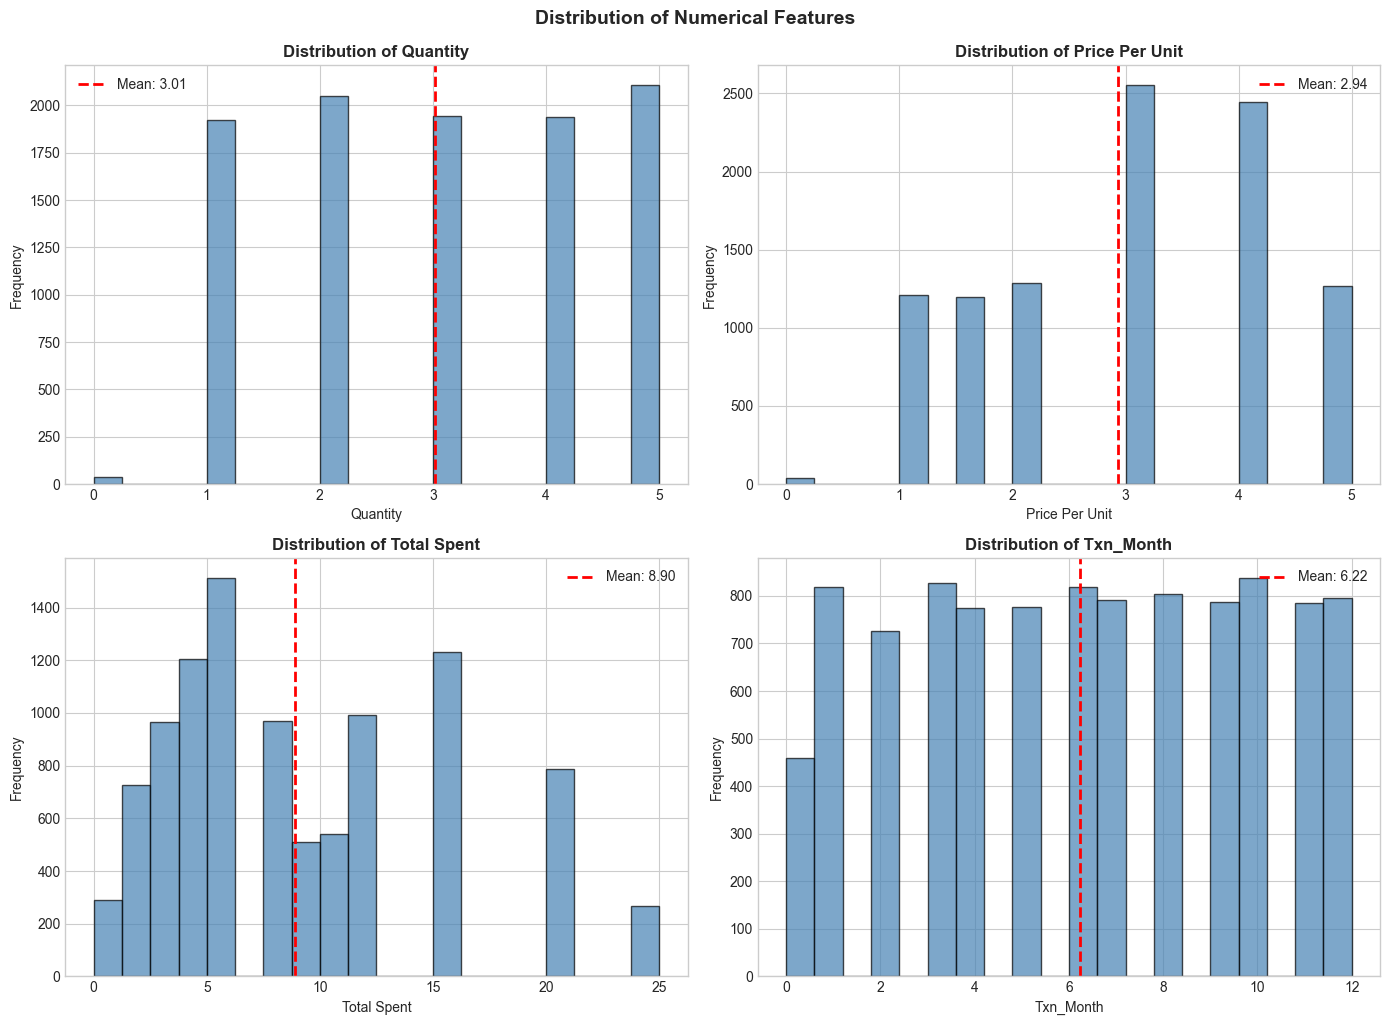

In [7]:
# Numerical columns analysis
numerical_cols = ['Quantity', 'Price Per Unit', 'Total Spent', 'Txn_Month']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df[col], bins=20, color='steelblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {df[col].mean():.2f}')
    axes[idx].legend()

plt.tight_layout()
plt.suptitle('Distribution of Numerical Features', fontsize=14, fontweight='bold', y=1.02)
plt.show()

## 6. Univariate Analysis - Categorical Features

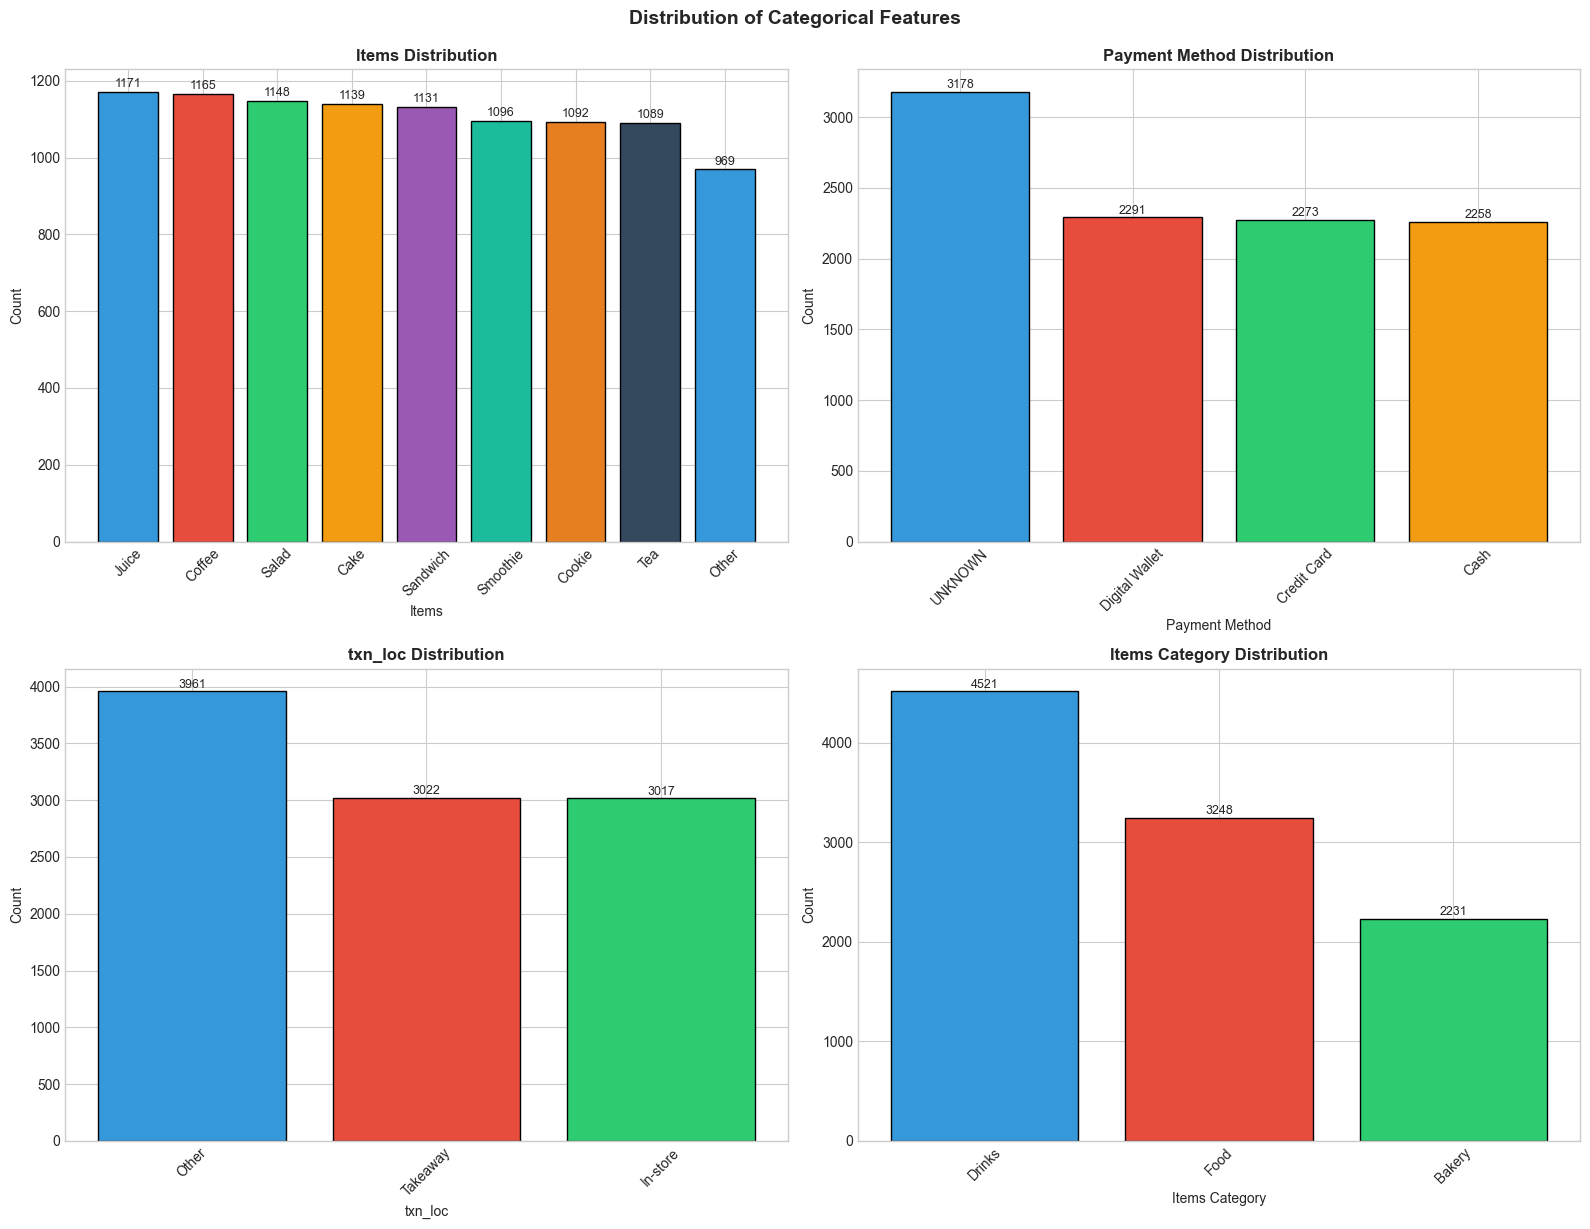

In [8]:
# Categorical columns analysis
categorical_cols = ['Items', 'Payment Method', 'txn_loc', 'Items Category']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6', '#1abc9c', '#e67e22', '#34495e']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    value_counts = df[col].value_counts()
    bars = axes[idx].bar(value_counts.index, value_counts.values, color=colors[:len(value_counts)], edgecolor='black')
    axes[idx].set_title(f'{col} Distribution', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for bar, val in zip(bars, value_counts.values):
        axes[idx].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
                       str(val), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.suptitle('Distribution of Categorical Features', fontsize=14, fontweight='bold', y=1.02)
plt.show()

## 7. Bivariate Analysis - Correlation Matrix

## 8. Sales Analysis by Items and Category

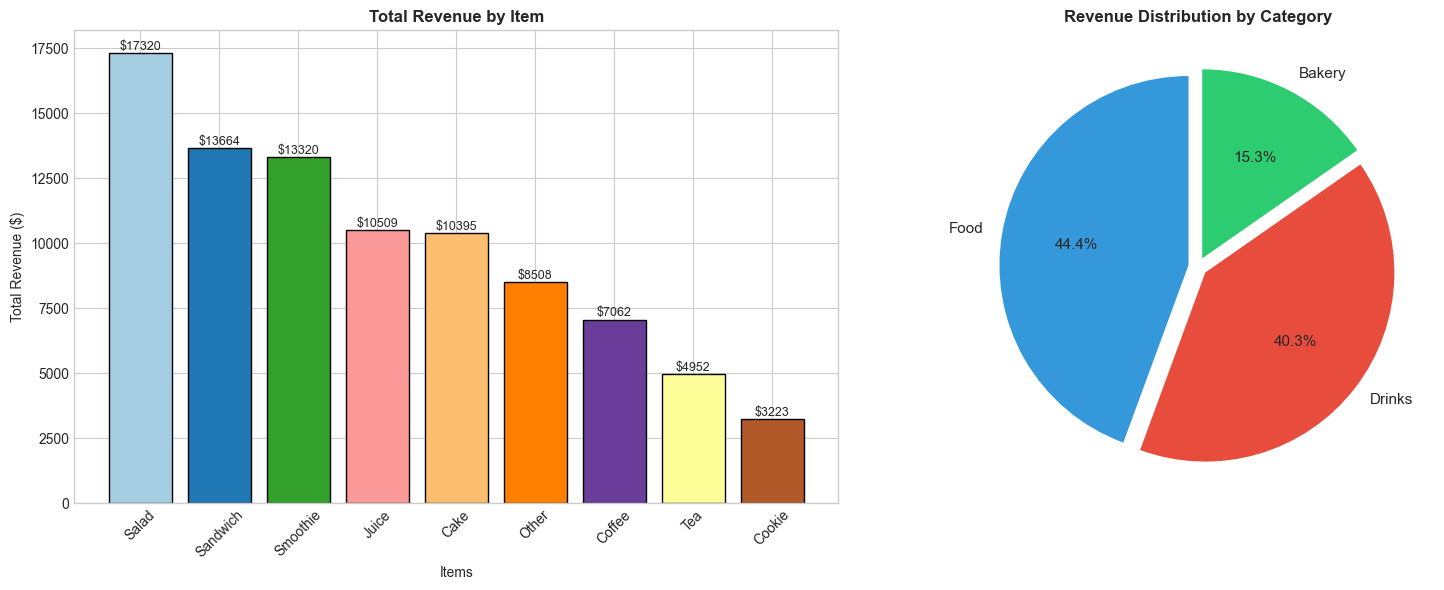


TOP SELLING ITEMS BY REVENUE
Items
Salad       17320.0
Sandwich    13664.0
Smoothie    13320.0
Juice       10509.0
Cake        10395.0
Other        8507.5
Coffee       7062.0
Tea          4951.5
Cookie       3223.0


In [10]:
# Sales analysis by Item
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Revenue by Item
item_revenue = df.groupby('Items')['Total Spent'].sum().sort_values(ascending=False)
colors_items = plt.cm.Paired(np.linspace(0, 1, len(item_revenue)))
bars1 = axes[0].bar(item_revenue.index, item_revenue.values, color=colors_items, edgecolor='black')
axes[0].set_title('Total Revenue by Item', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Items')
axes[0].set_ylabel('Total Revenue ($)')
axes[0].tick_params(axis='x', rotation=45)

# Add value labels
for bar, val in zip(bars1, item_revenue.values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, 
                 f'${val:.0f}', ha='center', va='bottom', fontsize=9)

# Revenue by Category
category_revenue = df.groupby('Items Category')['Total Spent'].sum().sort_values(ascending=False)
colors_cat = ['#3498db', '#e74c3c', '#2ecc71']
axes[1].pie(category_revenue.values, labels=category_revenue.index, autopct='%1.1f%%',
            colors=colors_cat, explode=[0.05]*len(category_revenue), startangle=90,
            textprops={'fontsize': 11})
axes[1].set_title('Revenue Distribution by Category', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("TOP SELLING ITEMS BY REVENUE")
print("="*60)
print(item_revenue.to_string())

## 9. Monthly Sales Trend Analysis

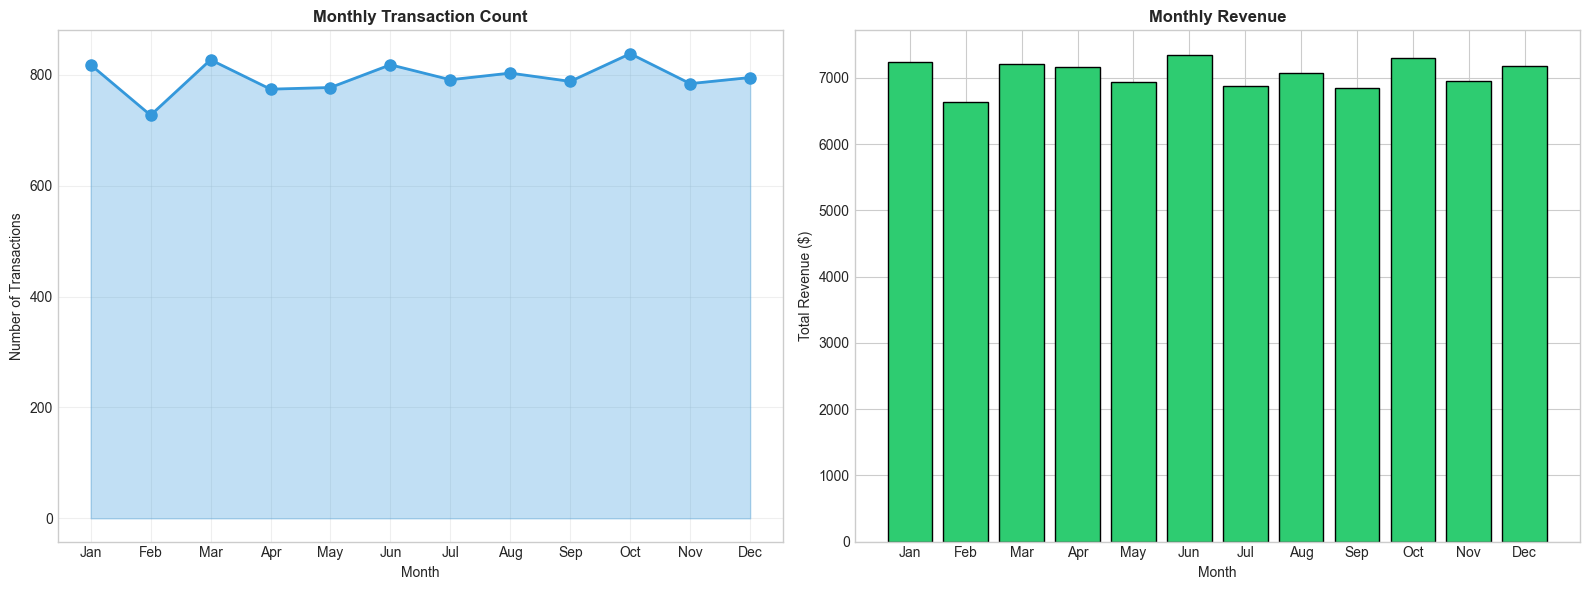


MONTHLY STATISTICS
           Transaction Count  Total Revenue  Avg Transaction Value
Txn_Month                                                         
1                        818         7242.0                   8.85
2                        727         6633.5                   9.12
3                        827         7214.5                   8.72
4                        774         7168.0                   9.26
5                        777         6941.5                   8.93
6                        818         7350.0                   8.99
7                        791         6877.5                   8.69
8                        803         7077.5                   8.81
9                        788         6846.0                   8.69
10                       838         7302.0                   8.71
11                       784         6957.0                   8.87
12                       795         7177.0                   9.03


In [11]:
# Monthly analysis (excluding month 0 which represents missing dates)
df_valid_dates = df[df['Txn_Month'] != 0]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Monthly Transaction Count
monthly_count = df_valid_dates.groupby('Txn_Month').size()
axes[0].plot(monthly_count.index, monthly_count.values, marker='o', linewidth=2, 
             markersize=8, color='#3498db')
axes[0].fill_between(monthly_count.index, monthly_count.values, alpha=0.3, color='#3498db')
axes[0].set_title('Monthly Transaction Count', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Number of Transactions')
axes[0].set_xticks(range(1, 13))
axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[0].grid(True, alpha=0.3)

# Monthly Revenue
monthly_revenue = df_valid_dates.groupby('Txn_Month')['Total Spent'].sum()
axes[1].bar(monthly_revenue.index, monthly_revenue.values, color='#2ecc71', edgecolor='black')
axes[1].set_title('Monthly Revenue', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Total Revenue ($)')
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.tight_layout()
plt.show()

# Monthly statistics
print("\n" + "="*60)
print("MONTHLY STATISTICS")
print("="*60)
monthly_stats = df_valid_dates.groupby('Txn_Month').agg({
    'Transaction ID': 'count',
    'Total Spent': ['sum', 'mean']
}).round(2)
monthly_stats.columns = ['Transaction Count', 'Total Revenue', 'Avg Transaction Value']
print(monthly_stats.to_string())

## 10. Outlier Detection with Box Plots

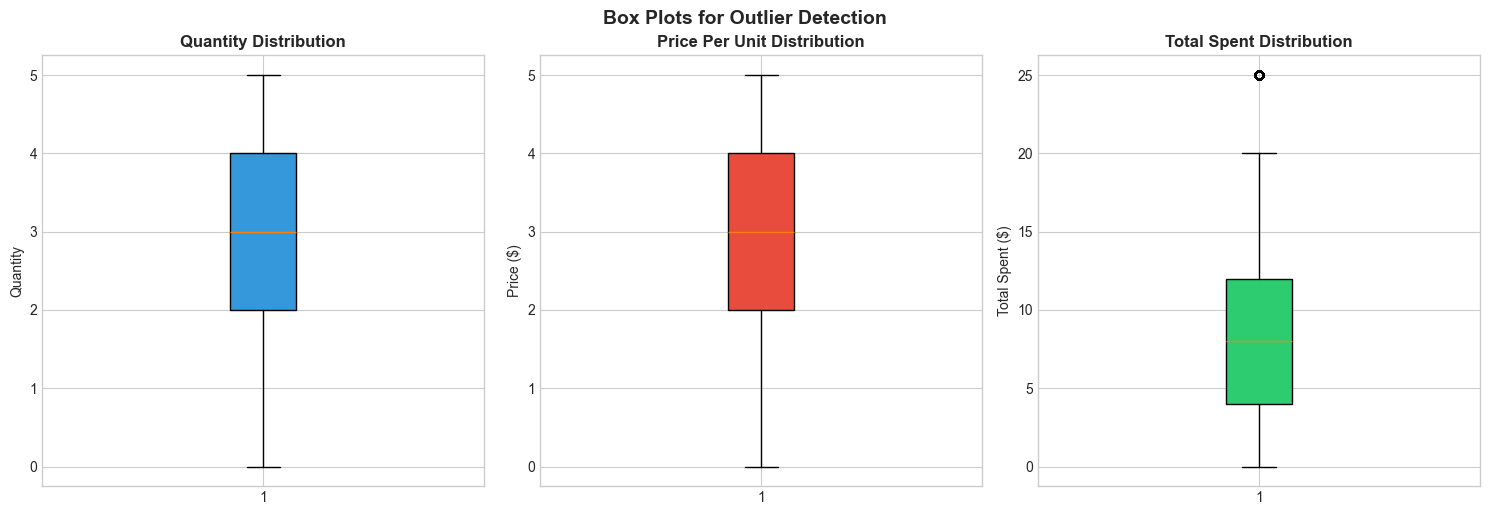


OUTLIER ANALYSIS (IQR Method)

Quantity:
  Q1: 2.00, Q3: 4.00, IQR: 2.00
  Lower bound: -1.00, Upper bound: 7.00
  Number of outliers: 0

Price Per Unit:
  Q1: 2.00, Q3: 4.00, IQR: 2.00
  Lower bound: -1.00, Upper bound: 7.00
  Number of outliers: 0

Total Spent:
  Q1: 4.00, Q3: 12.00, IQR: 8.00
  Lower bound: -8.00, Upper bound: 24.00
  Number of outliers: 268


In [12]:
# Box plots for outlier detection
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Quantity
bp1 = axes[0].boxplot(df['Quantity'], patch_artist=True)
bp1['boxes'][0].set_facecolor('#3498db')
axes[0].set_title('Quantity Distribution', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Quantity')

# Price Per Unit  
bp2 = axes[1].boxplot(df['Price Per Unit'], patch_artist=True)
bp2['boxes'][0].set_facecolor('#e74c3c')
axes[1].set_title('Price Per Unit Distribution', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Price ($)')

# Total Spent
bp3 = axes[2].boxplot(df['Total Spent'], patch_artist=True)
bp3['boxes'][0].set_facecolor('#2ecc71')
axes[2].set_title('Total Spent Distribution', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Total Spent ($)')

plt.tight_layout()
plt.suptitle('Box Plots for Outlier Detection', fontsize=14, fontweight='bold', y=1.02)
plt.show()

# Identify potential outliers using IQR method
print("\n" + "="*60)
print("OUTLIER ANALYSIS (IQR Method)")
print("="*60)
for col in ['Quantity', 'Price Per Unit', 'Total Spent']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\n{col}:")
    print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"  Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
    print(f"  Number of outliers: {len(outliers)}")

## 11. Payment Method and Transaction Location Analysis

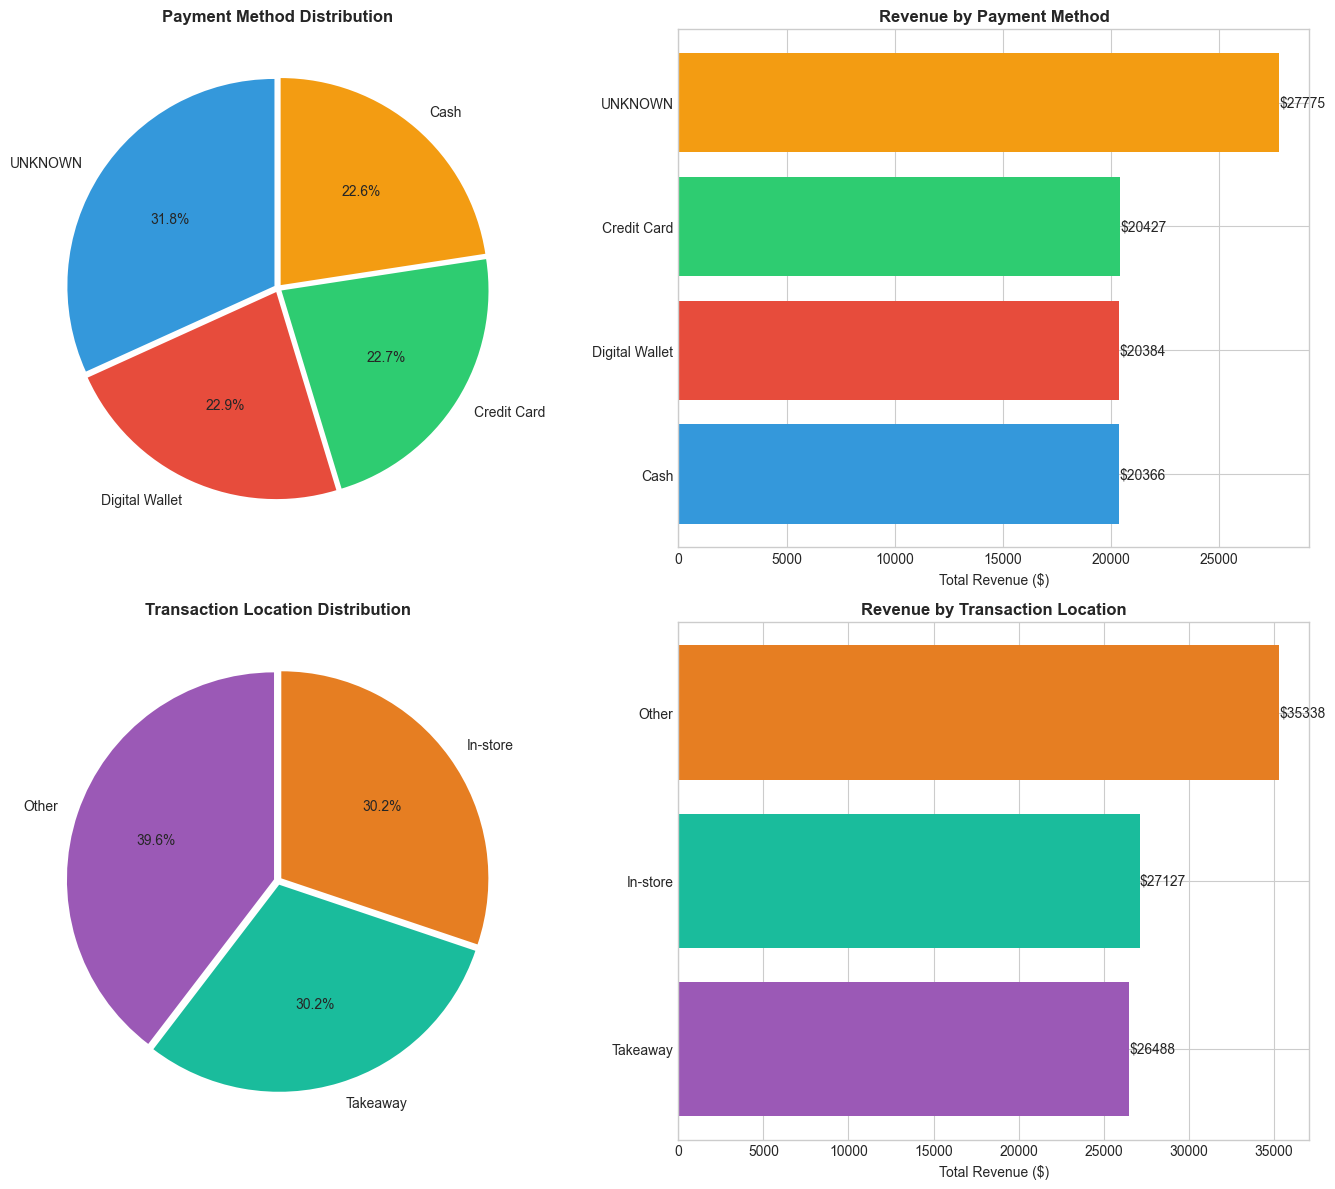


PAYMENT METHOD STATISTICS
                Count  Total Revenue  Avg Transaction
Payment Method                                       
Cash             2258        20366.5             9.02
Credit Card      2273        20427.0             8.99
Digital Wallet   2291        20383.5             8.90
UNKNOWN          3178        27775.0             8.74

TRANSACTION LOCATION STATISTICS
          Count  Total Revenue  Avg Transaction
txn_loc                                        
In-store   3017        27127.0             8.99
Other      3961        35337.5             8.92
Takeaway   3022        26487.5             8.76


In [13]:
# Payment Method and Transaction Location Analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Payment Method Distribution
payment_counts = df['Payment Method'].value_counts()
colors_payment = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']
axes[0, 0].pie(payment_counts.values, labels=payment_counts.index, autopct='%1.1f%%',
               colors=colors_payment, explode=[0.02]*len(payment_counts), startangle=90)
axes[0, 0].set_title('Payment Method Distribution', fontsize=12, fontweight='bold')

# Revenue by Payment Method
payment_revenue = df.groupby('Payment Method')['Total Spent'].sum().sort_values(ascending=True)
axes[0, 1].barh(payment_revenue.index, payment_revenue.values, color=colors_payment)
axes[0, 1].set_title('Revenue by Payment Method', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Total Revenue ($)')
for i, v in enumerate(payment_revenue.values):
    axes[0, 1].text(v + 10, i, f'${v:.0f}', va='center')

# Transaction Location Distribution
loc_counts = df['txn_loc'].value_counts()
colors_loc = ['#9b59b6', '#1abc9c', '#e67e22']
axes[1, 0].pie(loc_counts.values, labels=loc_counts.index, autopct='%1.1f%%',
               colors=colors_loc, explode=[0.02]*len(loc_counts), startangle=90)
axes[1, 0].set_title('Transaction Location Distribution', fontsize=12, fontweight='bold')

# Revenue by Transaction Location
loc_revenue = df.groupby('txn_loc')['Total Spent'].sum().sort_values(ascending=True)
axes[1, 1].barh(loc_revenue.index, loc_revenue.values, color=colors_loc)
axes[1, 1].set_title('Revenue by Transaction Location', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Total Revenue ($)')
for i, v in enumerate(loc_revenue.values):
    axes[1, 1].text(v + 10, i, f'${v:.0f}', va='center')

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\n" + "="*60)
print("PAYMENT METHOD STATISTICS")
print("="*60)
payment_stats = df.groupby('Payment Method').agg({
    'Transaction ID': 'count',
    'Total Spent': ['sum', 'mean']
}).round(2)
payment_stats.columns = ['Count', 'Total Revenue', 'Avg Transaction']
print(payment_stats.to_string())

print("\n" + "="*60)
print("TRANSACTION LOCATION STATISTICS")
print("="*60)
loc_stats = df.groupby('txn_loc').agg({
    'Transaction ID': 'count',
    'Total Spent': ['sum', 'mean']
}).round(2)
loc_stats.columns = ['Count', 'Total Revenue', 'Avg Transaction']
print(loc_stats.to_string())

## 12. Cross-Analysis: Items by Location and Payment Method

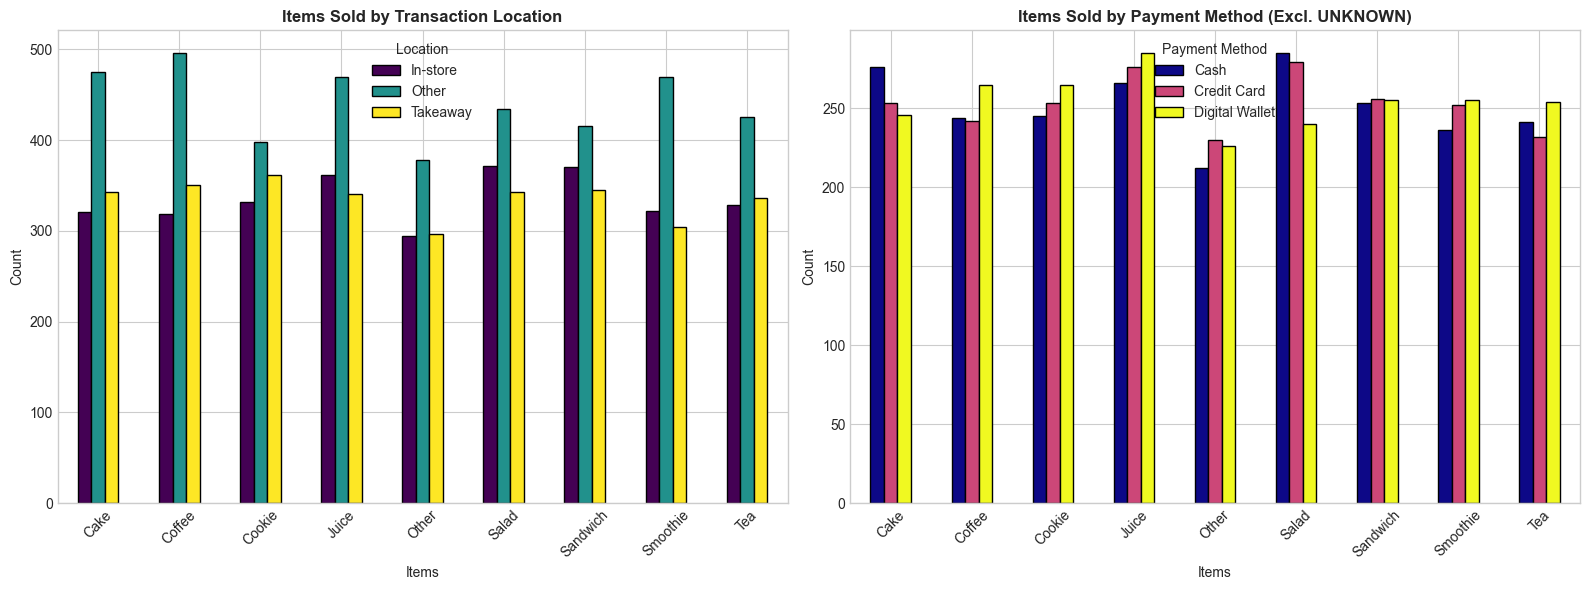

In [14]:
# Cross-tabulation: Items by Location
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Items by Transaction Location
cross_tab_loc = pd.crosstab(df['Items'], df['txn_loc'])
cross_tab_loc.plot(kind='bar', ax=axes[0], colormap='viridis', edgecolor='black')
axes[0].set_title('Items Sold by Transaction Location', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Items')
axes[0].set_ylabel('Count')
axes[0].legend(title='Location')
axes[0].tick_params(axis='x', rotation=45)

# Items by Payment Method (excluding UNKNOWN)
df_known_payment = df[df['Payment Method'] != 'UNKNOWN']
cross_tab_payment = pd.crosstab(df_known_payment['Items'], df_known_payment['Payment Method'])
cross_tab_payment.plot(kind='bar', ax=axes[1], colormap='plasma', edgecolor='black')
axes[1].set_title('Items Sold by Payment Method (Excl. UNKNOWN)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Items')
axes[1].set_ylabel('Count')
axes[1].legend(title='Payment Method')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 13. EDA Summary and Key Insights

In [15]:
# Generate comprehensive EDA summary
print("="*70)
print("                    EDA SUMMARY REPORT")
print("="*70)

print("\n📊 DATASET OVERVIEW:")
print("-"*50)
print(f"  • Total Transactions: {len(df):,}")
print(f"  • Total Revenue: ${df['Total Spent'].sum():,.2f}")
print(f"  • Average Transaction Value: ${df['Total Spent'].mean():.2f}")
print(f"  • Date Range: 2023 (with {(df['Txn_Month'] == 0).sum()} missing dates)")

print("\n🛒 TOP SELLING ITEMS:")
print("-"*50)
top_items_count = df['Items'].value_counts().head(3)
for item, count in top_items_count.items():
    print(f"  • {item}: {count} transactions")

print("\n💰 REVENUE INSIGHTS:")
print("-"*50)
item_revenue = df.groupby('Items')['Total Spent'].sum().sort_values(ascending=False)
top_revenue_item = item_revenue.idxmax()
print(f"  • Highest Revenue Item: {top_revenue_item} (${item_revenue.max():,.2f})")
category_revenue = df.groupby('Items Category')['Total Spent'].sum().sort_values(ascending=False)
top_category = category_revenue.idxmax()
print(f"  • Top Category: {top_category} (${category_revenue.max():,.2f})")

print("\n💳 PAYMENT METHODS:")
print("-"*50)
payment_dist = df['Payment Method'].value_counts()
for method, count in payment_dist.items():
    pct = (count / len(df)) * 100
    print(f"  • {method}: {count} ({pct:.1f}%)")

print("\n📍 TRANSACTION LOCATIONS:")
print("-"*50)
loc_dist = df['txn_loc'].value_counts()
for loc, count in loc_dist.items():
    pct = (count / len(df)) * 100
    print(f"  • {loc}: {count} ({pct:.1f}%)")

print("\n📅 MONTHLY TRENDS:")
print("-"*50)
df_valid = df[df['Txn_Month'] != 0]
monthly_revenue = df_valid.groupby('Txn_Month')['Total Spent'].sum()
best_month = monthly_revenue.idxmax()
worst_month = monthly_revenue.idxmin()
months = ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
print(f"  • Best Month: {months[best_month]} (${monthly_revenue.max():,.2f})")
print(f"  • Lowest Month: {months[worst_month]} (${monthly_revenue.min():,.2f})")

print("\n⚠️ DATA QUALITY NOTES:")
print("-"*50)
print(f"  • Unknown Payment Methods: {(df['Payment Method'] == 'UNKNOWN').sum()} transactions")
print(f"  • Missing Dates (N/A): {(df['Transaction Date'] == 'N/A').sum()} transactions")
print(f"  • Zero Quantity Records: {(df['Quantity'] == 0).sum()} records")

print("\n" + "="*70)
print("                    END OF EDA REPORT")
print("="*70)

                    EDA SUMMARY REPORT

📊 DATASET OVERVIEW:
--------------------------------------------------
  • Total Transactions: 10,000
  • Total Revenue: $88,952.00
  • Average Transaction Value: $8.90
  • Date Range: 2023 (with 460 missing dates)

🛒 TOP SELLING ITEMS:
--------------------------------------------------
  • Juice: 1171 transactions
  • Coffee: 1165 transactions
  • Salad: 1148 transactions

💰 REVENUE INSIGHTS:
--------------------------------------------------
  • Highest Revenue Item: Salad ($17,320.00)
  • Top Category: Food ($39,491.50)

💳 PAYMENT METHODS:
--------------------------------------------------
  • UNKNOWN: 3178 (31.8%)
  • Digital Wallet: 2291 (22.9%)
  • Credit Card: 2273 (22.7%)
  • Cash: 2258 (22.6%)

📍 TRANSACTION LOCATIONS:
--------------------------------------------------
  • Other: 3961 (39.6%)
  • Takeaway: 3022 (30.2%)
  • In-store: 3017 (30.2%)

📅 MONTHLY TRENDS:
--------------------------------------------------
  • Best Month: Jun ($7

## Monthly Analysis by Payment Method & Item Category

       MONTHLY REVENUE BY PAYMENT METHOD
Payment Method    Cash  Credit Card  Digital Wallet  UNKNOWN
Txn_Month                                                   
Jan             1704.5       1776.5          1570.5   2190.5
Feb             1459.0       1555.0          1546.0   2073.5
Mar             1735.5       1751.0          1493.0   2235.0
Apr             1509.5       1563.5          1682.5   2412.5
May             1506.5       1431.0          1505.0   2499.0
Jun             1746.0       1682.5          1648.0   2273.5
Jul             1546.0       1530.0          1636.5   2165.0
Aug             1658.0       1850.0          1447.0   2122.5
Sep             1761.5       1596.0          1618.5   1870.0
Oct             1655.5       1487.5          1853.0   2306.0
Nov             1620.5       1525.0          1808.5   2003.0
Dec             1592.5       1708.5          1704.0   2172.0



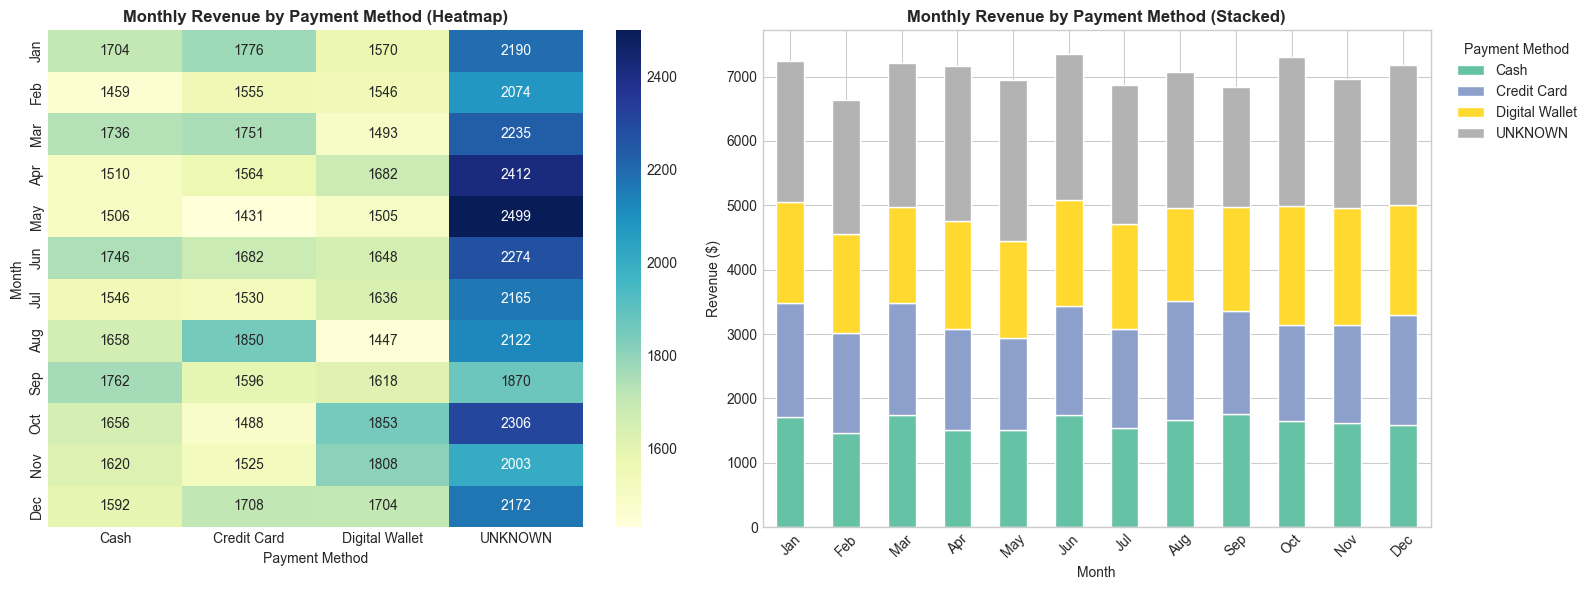


📊 PAYMENT METHOD MONTHLY INSIGHTS:
--------------------------------------------------
  • Cash: Best month = Sep ($1,762), Worst month = Feb ($1,459)
  • Credit Card: Best month = Aug ($1,850), Worst month = May ($1,431)
  • Digital Wallet: Best month = Oct ($1,853), Worst month = Aug ($1,447)
  • UNKNOWN: Best month = May ($2,499), Worst month = Sep ($1,870)


In [17]:
# Monthly Analysis by Payment Method
df_valid_months = df[df['Txn_Month'] > 0]  # Exclude invalid months (0)

# Create pivot table: Month vs Payment Method (Revenue)
payment_monthly = df_valid_months.pivot_table(
    values='Total Spent', 
    index='Txn_Month', 
    columns='Payment Method', 
    aggfunc='sum',
    fill_value=0
)

# Rename index for better readability
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
               7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
payment_monthly.index = payment_monthly.index.map(month_names)

print("="*70)
print("       MONTHLY REVENUE BY PAYMENT METHOD")
print("="*70)
print(payment_monthly.to_string())
print()

# Visualize as heatmap
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap
sns.heatmap(payment_monthly, annot=True, fmt='.0f', cmap='YlGnBu', ax=axes[0])
axes[0].set_title('Monthly Revenue by Payment Method (Heatmap)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Payment Method')
axes[0].set_ylabel('Month')

# Stacked bar chart
payment_monthly.plot(kind='bar', stacked=True, ax=axes[1], 
                     colormap='Set2', edgecolor='white')
axes[1].set_title('Monthly Revenue by Payment Method (Stacked)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Revenue ($)')
axes[1].legend(title='Payment Method', bbox_to_anchor=(1.02, 1), loc='upper left')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Summary statistics
print("\n📊 PAYMENT METHOD MONTHLY INSIGHTS:")
print("-"*50)
for method in payment_monthly.columns:
    best_month = payment_monthly[method].idxmax()
    worst_month = payment_monthly[method].idxmin()
    print(f"  • {method}: Best month = {best_month} (${payment_monthly[method].max():,.0f}), "
          f"Worst month = {worst_month} (${payment_monthly[method].min():,.0f})")

       MONTHLY REVENUE BY ITEM CATEGORY
Items Category  Bakery  Drinks    Food
Txn_Month                             
Jan             1105.0  2614.0  3523.0
Feb              907.0  2820.0  2906.5
Mar             1070.0  2949.0  3195.5
Apr             1023.0  2942.5  3202.5
May             1109.0  2719.0  3113.5
Jun             1032.0  2972.0  3346.0
Jul             1003.0  2641.5  3233.0
Aug             1083.0  2781.0  3213.5
Sep             1121.0  2774.0  2951.0
Oct             1208.0  3159.0  2935.0
Nov             1214.0  2756.0  2987.0
Dec             1017.0  3109.0  3051.0



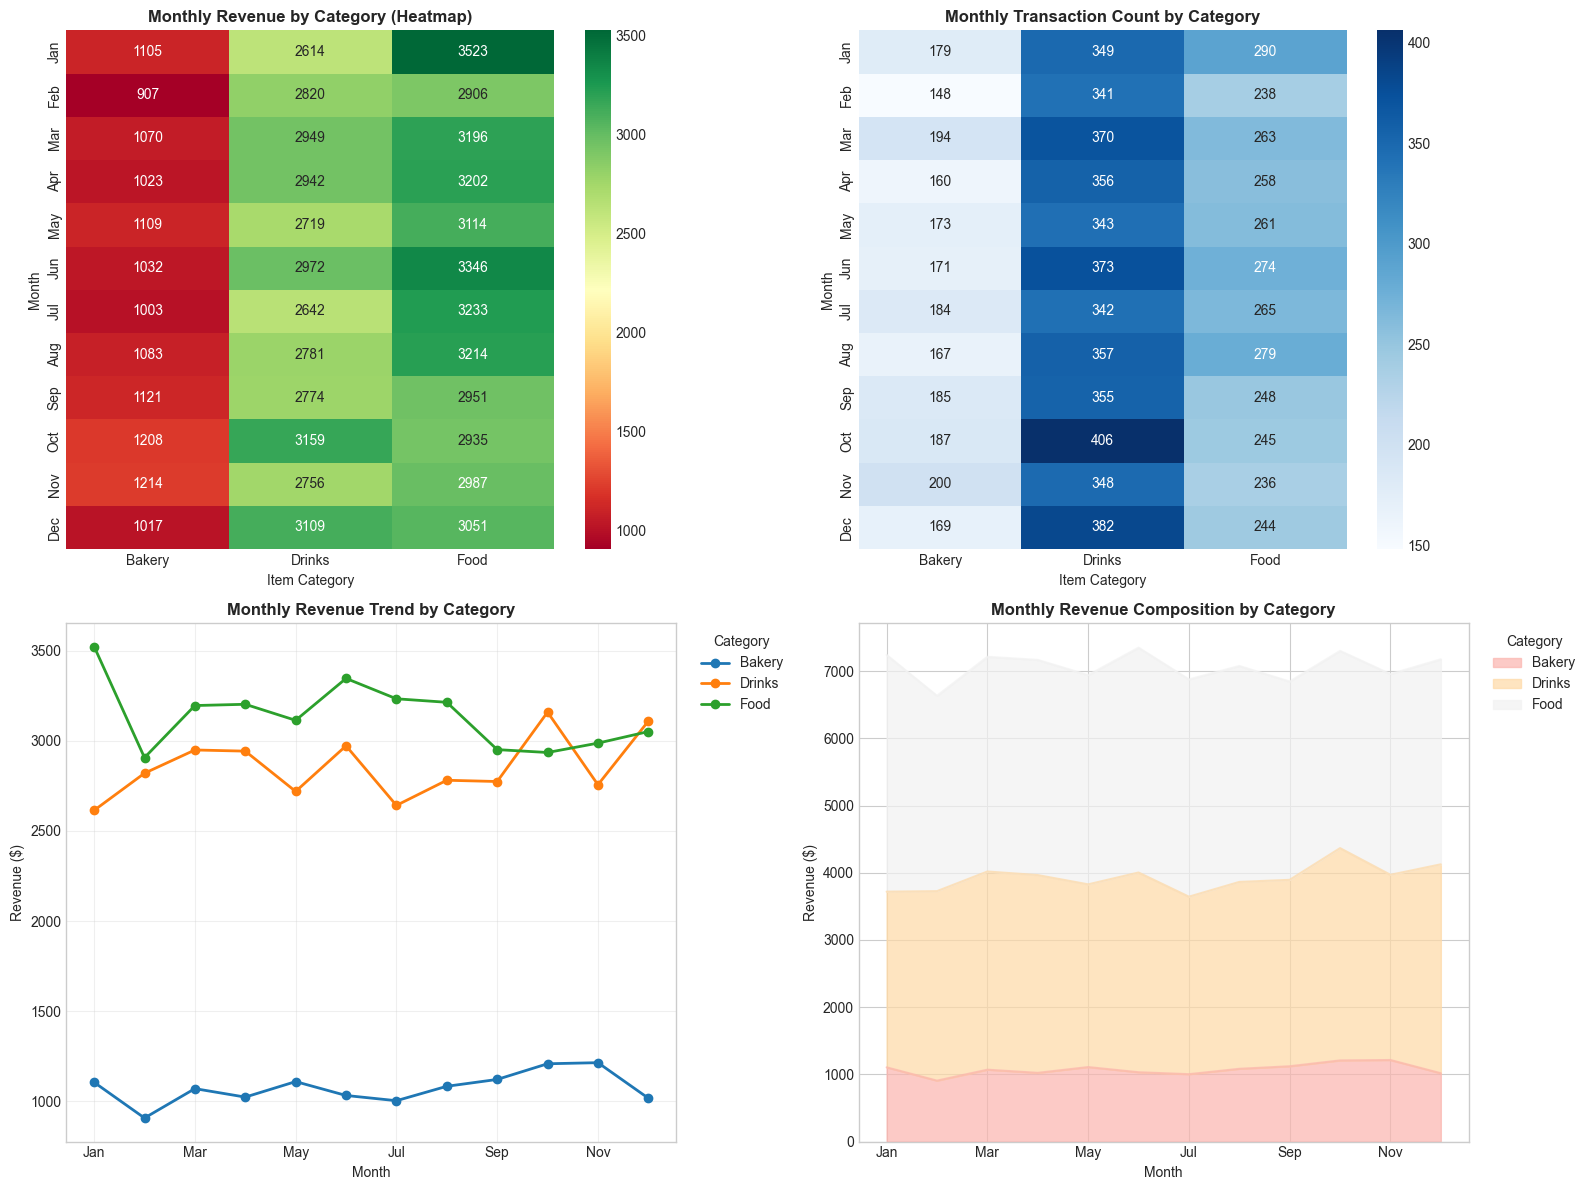


📊 ITEM CATEGORY MONTHLY INSIGHTS:
--------------------------------------------------
  • Bakery: Best = Nov ($1,214), Worst = Feb ($907), Avg = $1,074/month
  • Drinks: Best = Oct ($3,159), Worst = Jan ($2,614), Avg = $2,853/month
  • Food: Best = Jan ($3,523), Worst = Feb ($2,906), Avg = $3,138/month


In [18]:
# Monthly Analysis by Item Category
category_monthly = df_valid_months.pivot_table(
    values='Total Spent', 
    index='Txn_Month', 
    columns='Items Category', 
    aggfunc='sum',
    fill_value=0
)

# Rename index for better readability
category_monthly.index = category_monthly.index.map(month_names)

print("="*70)
print("       MONTHLY REVENUE BY ITEM CATEGORY")
print("="*70)
print(category_monthly.to_string())
print()

# Also create transaction count pivot
category_monthly_count = df_valid_months.pivot_table(
    values='Transaction ID', 
    index='Txn_Month', 
    columns='Items Category', 
    aggfunc='count',
    fill_value=0
)
category_monthly_count.index = category_monthly_count.index.map(month_names)

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Heatmap - Revenue
sns.heatmap(category_monthly, annot=True, fmt='.0f', cmap='RdYlGn', ax=axes[0, 0])
axes[0, 0].set_title('Monthly Revenue by Category (Heatmap)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Item Category')
axes[0, 0].set_ylabel('Month')

# Heatmap - Transaction Count
sns.heatmap(category_monthly_count, annot=True, fmt='.0f', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title('Monthly Transaction Count by Category', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Item Category')
axes[0, 1].set_ylabel('Month')

# Line chart for trends
category_monthly.plot(kind='line', marker='o', ax=axes[1, 0], linewidth=2, markersize=6)
axes[1, 0].set_title('Monthly Revenue Trend by Category', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Revenue ($)')
axes[1, 0].legend(title='Category', bbox_to_anchor=(1.02, 1), loc='upper left')
axes[1, 0].grid(True, alpha=0.3)

# Stacked area chart
category_monthly.plot(kind='area', stacked=True, ax=axes[1, 1], alpha=0.7, colormap='Pastel1')
axes[1, 1].set_title('Monthly Revenue Composition by Category', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Revenue ($)')
axes[1, 1].legend(title='Category', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Summary statistics
print("\n📊 ITEM CATEGORY MONTHLY INSIGHTS:")
print("-"*50)
for category in category_monthly.columns:
    best_month = category_monthly[category].idxmax()
    worst_month = category_monthly[category].idxmin()
    avg_revenue = category_monthly[category].mean()
    print(f"  • {category}: Best = {best_month} (${category_monthly[category].max():,.0f}), "
          f"Worst = {worst_month} (${category_monthly[category].min():,.0f}), Avg = ${avg_revenue:,.0f}/month")